In [1026]:
from pyedflib import highlevel
import numpy as np
import pandas as pd
import peakutils

In [1027]:
import matplotlib.pyplot as plt

In [1028]:
signals, signal_headers, header = highlevel.read_edf('Documents/Tani_eeg/P98/WTM41R_FPT.edf')

In [1029]:
a=signals[0]
b=signals[1]
c=signals[2]
#r=c

In [1030]:
Fs=2000

In [1031]:
fft_freq_array=[]
fft_vals_array=[]
baseline_values_array=[]
t=[]
# Get frequencies for amplitudes in Hz
for i in range(len(signals)):
    fft_freq_array.append(np.fft.rfftfreq(len(signals[i]), 1.0/Fs))
    fft_vals_array.append(np.absolute(np.fft.rfft(signals[i])))
    baseline_values_array.append(peakutils.baseline(signals[i]))
    t.append(np.arange(len(signals[i])))

In [1032]:
# Define EEG bands
eeg_bands = {'Delta': (0.5, 4),
             'Theta': (4, 8),
             'Alpha': (8, 13),
             'Beta': (13, 30),
             'Low Gamma': (30,60),
            'High Gamma': (60,100)}

In [1033]:
Freq_ranges=['Delta','Theta','Alpha','Beta','Low Gamma','High Gamma']

In [1034]:
data_eeg_bands = []

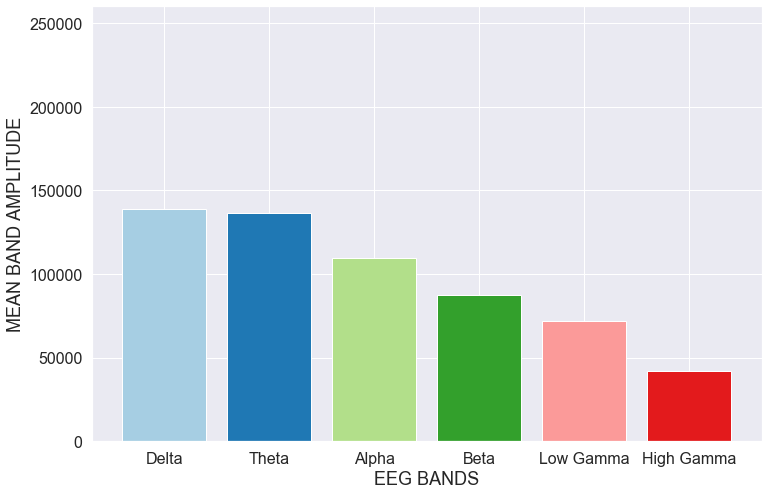

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


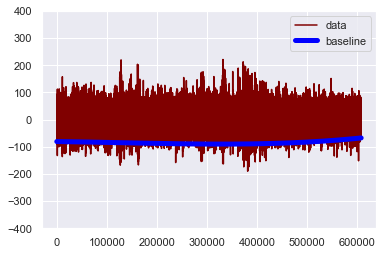

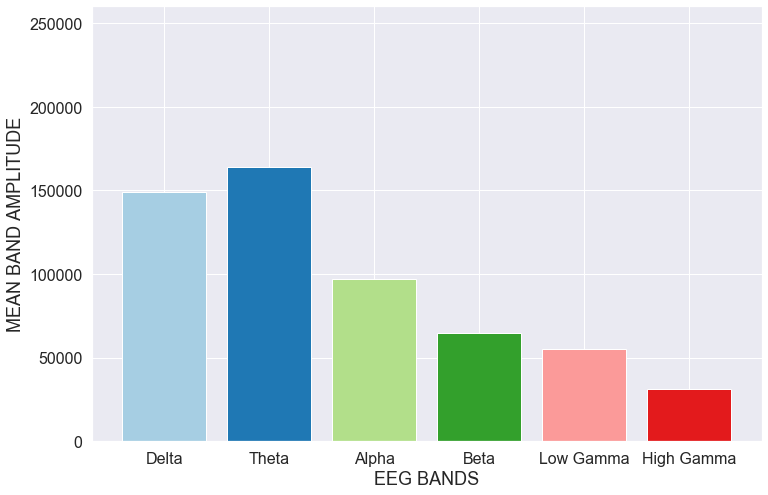

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


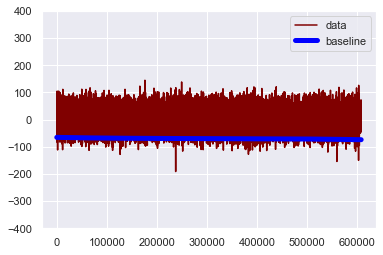

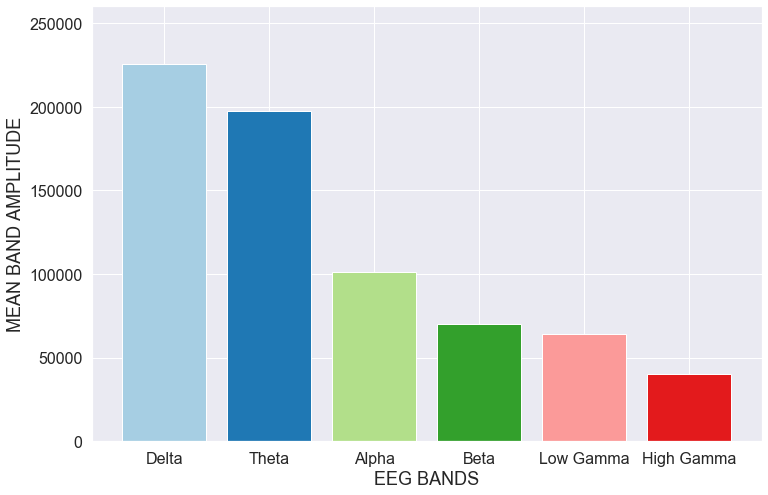

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


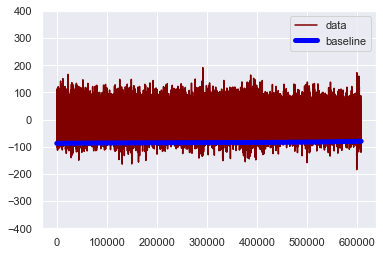

In [1035]:
for i in range(len(signals)):
    eeg_band_fft = dict()
    fft_freq=fft_freq_array[i]
    fft_vals=fft_vals_array[i]
    for band in eeg_bands:  
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                           (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
    df = pd.DataFrame(columns=['band', 'val'])
    df['band'] = eeg_bands.keys()
    df['val'] = [eeg_band_fft[band] for band in eeg_bands]
    data_eeg_bands.append(df)
    eeg_bands_xticks=['Delta','Theta','Alpha','Beta','Low Gamma','High Gamma']
    eeg_bands_xticks_num=[0,1,2,3,4,5]
    plt.figure(figsize=(12, 8))
    ax=plt.bar(range(len(df)), df["val"], label=df['band'],color=plt.cm.Paired(np.arange(len(df))))
    plt.xlabel('EEG BANDS',size=18)
    plt.ylabel('MEAN BAND AMPLITUDE',size=18)
    plt.xticks(eeg_bands_xticks_num,eeg_bands_xticks,size=16)
    plt.yticks(size=16)
    plt.ylim(0,260000)
    plt.show()
    plt.plot(t[i],signals[i],color='maroon',label='data')
    plt.plot(t[i],baseline_values_array[i],color='blue',linewidth=5,label='baseline')
    plt.ylim(-400,400)
    plt.legend()

In [1036]:
data_eeg_bands[0]

,band,val
0,Delta,138950.420356
1,Theta,136736.104776
2,Alpha,109743.896879
3,Beta,87737.998421
4,Low Gamma,71837.146016
5,High Gamma,42111.182968


In [1037]:
data_eeg_bands[1]

,band,val
0,Delta,149278.678416
1,Theta,164018.485422
2,Alpha,97118.699995
3,Beta,64836.867340
4,Low Gamma,54936.071197
5,High Gamma,31060.319527


In [1038]:
data_eeg_bands[2]

,band,val
0,Delta,225728.746673
1,Theta,197579.184257
2,Alpha,101349.236863
3,Beta,70048.380642
4,Low Gamma,64042.878835
5,High Gamma,40071.880249


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


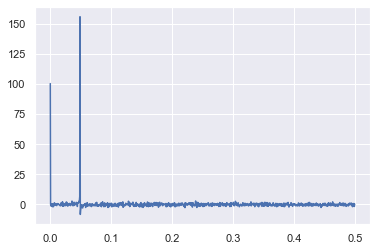

In [1039]:
import numpy as np
import matplotlib.pyplot as plt

N = 2048
x = np.sin(2*np.pi*10*np.linspace(0,10,N)) + np.random.random(N)*0.1

z = np.fft.rfft(x) # FFT
y = np.fft.rfftfreq(len(x)) # Frequency data

fig, ax = plt.subplots()
ax.plot(y, z)

plt.show()

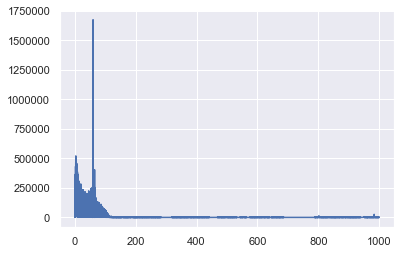

In [1040]:
z=fft_vals_array[0]
y=fft_freq_array[0]

fig, ax = plt.subplots()
ax.plot(y, z)
plt.xticks()
plt.show()

In [1041]:
from scipy import signal

(0, 140)

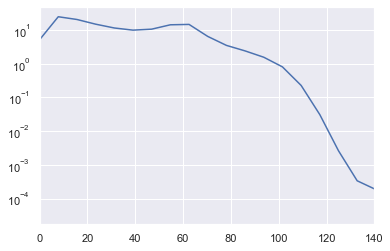

In [1042]:
u,v1=signal.welch(signals[0],Fs)
u,v2=signal.welch(signals[1],Fs)
u,v3=signal.welch(signals[2],Fs)
plt.semilogy(u, v1)
plt.xlim(0,140)

In [1043]:
#np.savetxt('v1_ko',v1,fmt='%f')
#np.savetxt('v2_ko',v2,fmt='%f')
#np.savetxt('v3_ko',v3,fmt='%f')

plt.plot(u, v,label='KO')
plt.plot(u,v_wt,label='WT')
plt.xlim(0,140)
plt.legend()
plt.ylabel('POWER/FREQUENCY (dB/HZ)',size=16)
plt.xlabel('Frequency(HZ)',size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Welch Spectral Density Plot for WT and KO when treated with FPT  \n Channel 1',size=18)

In [1044]:
v1_ko=np.loadtxt('v1_ko',dtype=float)
v2_ko=np.loadtxt('v2_ko',dtype=float)
v3_ko=np.loadtxt('v3_ko',dtype=float)

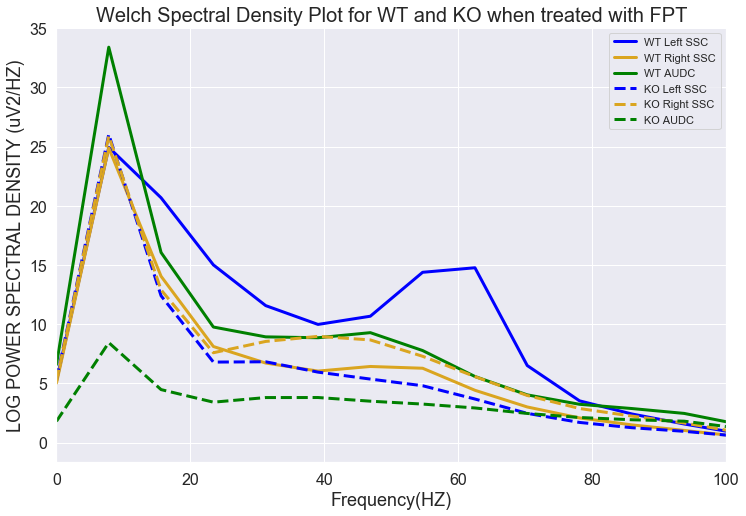

In [1065]:
plt.figure(figsize=(12, 8))
plt.plot(u,v1,color='blue',linewidth=3,label='WT Left SSC')
plt.plot(u,v2,color='goldenrod',linewidth=3, label='WT Right SSC')
plt.plot(u,v3,color='green',linewidth=3,label='WT AUDC')
plt.plot(u,v1_ko,color='blue',linewidth=3,linestyle='--',label='KO Left SSC')
plt.plot(u,v2_ko,color='goldenrod',linewidth=3,linestyle='--',label='KO Right SSC')
plt.plot(u,v3_ko,color='green',linewidth=3,linestyle='--',label='KO AUDC')
plt.xlim(0,100)
plt.ylabel('LOG POWER SPECTRAL DENSITY (uV2/HZ)',size=18)
plt.xlabel('Frequency(HZ)',size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('Welch Spectral Density Plot for WT and KO when treated with FPT',size=20)
plt.legend()